In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from click import option
from finx_option_pricer.option import Option
from finx_option_pricer.option_plot import OptionsPlot, OptionPosition

import matplotlib
import matplotlib.pyplot as plt

In [3]:
spot_range = [65, 140]

oil_price = 102.67

# long 14d put
op1 = OptionPosition(
    quantity=1, 
    option=Option(S=oil_price, K=110, T=14/252, r=0.0, sigma=0.65, option_type='p'))

# short 7d call @ 95
op2 = OptionPosition(
    quantity=-1, 
    option=Option(S=oil_price, K=108, T=8/252, r=0.0, sigma=0.65, option_type='p'))

op_plot = OptionsPlot(
    option_positions=[
        op1, op2
    ], 
    spot_range=spot_range)

op_plot.describe_option_positions()

df = op_plot.gen_value_df_timeincrementing(10, 1)
df.set_index("strikes", inplace=True)

# set time incremeting columns
columns = [f"t{i}" for i, _ in enumerate(df.columns)]
columns[-1] = "tf"
df.columns = columns


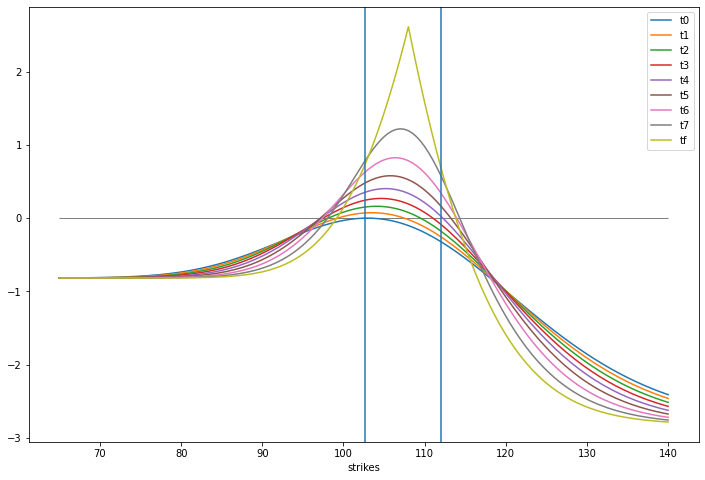

In [5]:
df.plot(figsize=(12, 8))
plt.hlines(0, spot_range[0], spot_range[1], color="black", linewidth=0.5)
plt.axvline(x=oil_price)
plt.axvline(x=112)